##Lab2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from tensorflow import keras
import seaborn as sns
warnings.simplefilter("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/1 FPT/5Su23/DPL302m/Spotify Genres Classification/genres_v2.csv") # Download dataset from
#data = pd.read_csv("genres_v2.csv")
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [4]:
data.iloc[:,:20]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN


#**EDA**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [6]:
# drop unnecessary columns
df = data.drop(columns=['type','title', 'Unnamed: 0', 'id', 'uri', 'track_href',
                        'analysis_url', 'duration_ms', 'time_signature',
                        'song_name'])  # axis=1
# drop duplicates
df = df.drop_duplicates()

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in dataset.")

df.isnull().sum()

There are 38123 rows and 12 columns in dataset.


danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [7]:
df["genre"].value_counts()

Underground Rap    5771
Dark Trap          4517
Hiphop             2960
trance             2734
techno             2632
psytrance          2610
dnb                2407
hardstyle          2277
trap               2226
techhouse          2192
RnB                2039
Trap Metal         1897
Rap                1808
Emo                1601
Pop                 452
Name: genre, dtype: int64

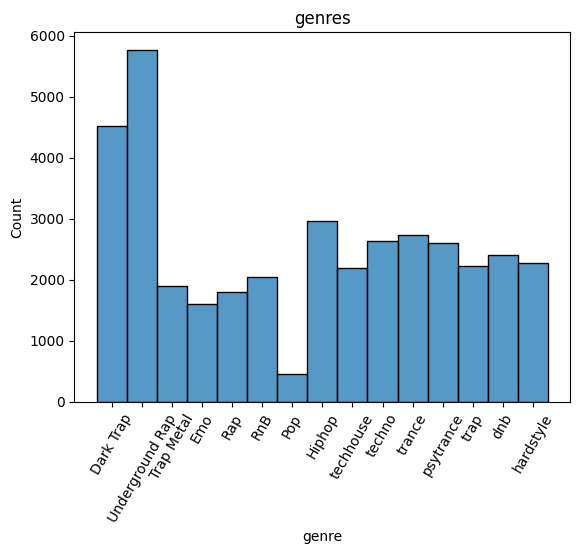

In [8]:
ax = sns.histplot(df['genre'])
_ = plt.xticks(rotation=60)
_ = plt.title('genres')

In [9]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,-0.321160,-0.016759,-0.193622,0.074895,0.197339,0.065946,-0.097100,-0.195603,0.355699,-0.143705
energy,-0.321160,1.000000,0.046902,0.598260,-0.029414,-0.151513,-0.492026,0.312547,0.235504,-0.006421,-0.024516
key,-0.016759,0.046902,1.000000,-0.004399,-0.249534,-0.029004,-0.004080,0.067507,0.001410,0.025920,-0.007263
loudness,-0.193622,0.598260,-0.004399,1.000000,0.000741,0.036798,-0.280691,-0.179648,0.163362,0.102819,0.140020
mode,0.074895,-0.029414,-0.249534,0.000741,1.000000,0.047029,-0.016480,-0.021464,0.011063,0.014890,-0.006242
speechiness,0.197339,-0.151513,-0.029004,0.036798,0.047029,1.000000,0.158261,-0.389265,0.051743,0.240284,0.166402
acousticness,0.065946,-0.492026,-0.004080,-0.280691,-0.016480,0.158261,1.000000,-0.262091,-0.109838,0.101454,0.051641
instrumentalness,-0.097100,0.312547,0.067507,-0.179648,-0.021464,-0.389265,-0.262091,1.000000,-0.007423,-0.280635,-0.200607
liveness,-0.195603,0.235504,0.001410,0.163362,0.011063,0.051743,-0.109838,-0.007423,1.000000,-0.016680,0.025041
valence,0.355699,-0.006421,0.025920,0.102819,0.014890,0.240284,0.101454,-0.280635,-0.016680,1.000000,0.083838


In [10]:
x = df.drop('genre', axis=1)
y = df["genre"]

In [11]:
y

0        Dark Trap
1        Dark Trap
2        Dark Trap
3        Dark Trap
4        Dark Trap
           ...    
42298    hardstyle
42300    hardstyle
42302    hardstyle
42303    hardstyle
42304    hardstyle
Name: genre, Length: 38123, dtype: object

In [12]:
y.unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

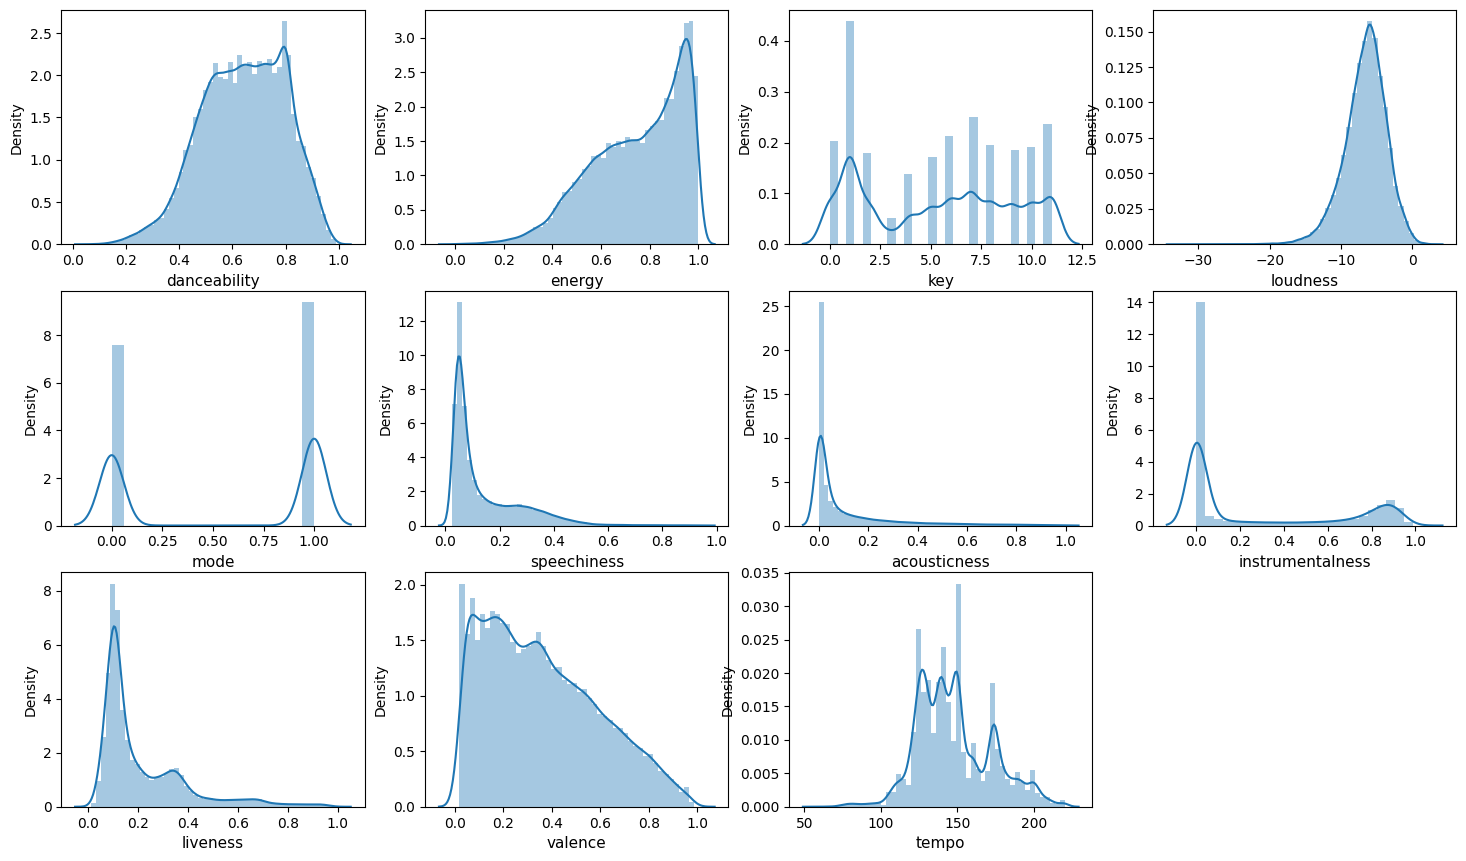

In [13]:
k=0
plt.figure(figsize = (18,14))
for i in x.columns:
  plt.subplot(4,4, k + 1)
  sns.distplot(x[i])
  plt.xlabel(i, fontsize=11)
  k +=1

## **Data Preprocessing**

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42, shuffle = True)

In [15]:
scalerx = MinMaxScaler()
x_train = scalerx.fit_transform(x_train)
x_test = scalerx.transform(x_test)

In [16]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Dark Trap': 0, 'Emo': 1, 'Hiphop': 2, 'Pop': 3, 'Rap': 4, 'RnB': 5, 'Trap Metal': 6, 'Underground Rap': 7, 'dnb': 8, 'hardstyle': 9, 'psytrance': 10, 'techhouse': 11, 'techno': 12, 'trance': 13, 'trap': 14}


In [17]:
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights = True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 10, restore_best_weights = True)

In [18]:
# !pip install scikeras
# from scikeras.wrappers import KerasClassifier

In [19]:
!pip install keras-tuner
import kerastuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.5 MB/s eta 0:00:00


In [26]:
import tensorflow as tf
def create_model(hp):
    dropout_rate = 0.1
    learning_rate = 0.01
    num_hidden_layers = 1
    num_units = 8

    if hp:
        dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5)
        learning_rate = hp.Float('learning_rate', min_value=0.0005, max_value=0.0015, step = 0.0005)
        num_hidden_layers = hp.Choice('num_hidden_layers', values=[3, 4, 5])
        num_units = hp.Choice('num_units', values=[128, 256])

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Input(name='input', shape=(x_train.shape[1])))

    for _ in range(0, num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_units, activation='relu'))
        model.add(tf.keras.layers.Dropout(dropout_rate))
        model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Dense(max(y_train)+1, activation = "softmax"))

    model.compile(optimizer = keras.optimizers.Adam(),
                 loss = "sparse_categorical_crossentropy",
                 metrics = ["accuracy"]
    )
    return model

In [27]:
create_model(None).summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 96        
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 batch_normalization_5 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 15)                135       
                                                                 
Total params: 263
Trainable params: 247
Non-trainable params: 16
_________________________________________________________________


In [28]:
class CustomTuner(kerastuner.tuners.BayesianOptimization):
    def run_trial(self, trial, *args, **kwargs):
        kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', 128, 512, step = 128)
        return super(CustomTuner, self).run_trial(trial, *args, **kwargs)

In [29]:
tuner = CustomTuner(
    create_model,
    objective='val_accuracy',
    max_trials=20,
    directory='logs',
    project_name='SpotifyGenresClassification',
    overwrite=True
)

In [30]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0005, 'conditions': [], 'min_value': 0.0005, 'max_value': 0.0015, 'step': 0.0005, 'sampling': 'linear'}
num_hidden_layers (Choice)
{'default': 3, 'conditions': [], 'values': [3, 4, 5], 'ordered': True}
num_units (Choice)
{'default': 128, 'conditions': [], 'values': [128, 256], 'ordered': True}


In [31]:
tuner.search(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5, verbose=True,
    callbacks=[early_stopping1, early_stopping2]
)

Trial 20 Complete [00h 00m 23s]
val_accuracy: 0.5889835953712463

Best val_accuracy So Far: 0.5889835953712463
Total elapsed time: 00h 05m 06s


In [32]:
tuner.results_summary(1)

Results summary
Results in logs/SpotifyGenresClassification
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 19 summary
Hyperparameters:
dropout_rate: 0.1
learning_rate: 0.0005
num_hidden_layers: 5
num_units: 256
batch_size: 128
Score: 0.5889835953712463


In [33]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

In [34]:
model_history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100, verbose=True,
    callbacks=[early_stopping1, early_stopping2]
)

Epoch 1/100
954/954 [==============================] - 13s 10ms/step - loss: 1.4145 - accuracy: 0.5102 - val_loss: 1.2504 - val_accuracy: 0.5613
Epoch 2/100
954/954 [==============================] - 9s 9ms/step - loss: 1.3775 - accuracy: 0.5223 - val_loss: 1.2427 - val_accuracy: 0.5634
Epoch 3/100
954/954 [==============================] - 9s 9ms/step - loss: 1.3292 - accuracy: 0.5374 - val_loss: 1.1781 - val_accuracy: 0.5824
Epoch 4/100
954/954 [==============================] - 9s 9ms/step - loss: 1.3070 - accuracy: 0.5409 - val_loss: 1.1869 - val_accuracy: 0.5776
Epoch 5/100
954/954 [==============================] - 8s 8ms/step - loss: 1.3094 - accuracy: 0.5425 - val_loss: 1.1571 - val_accuracy: 0.5890
Epoch 6/100
954/954 [==============================] - 9s 9ms/step - loss: 1.2815 - accuracy: 0.5517 - val_loss: 1.1538 - val_accuracy: 0.5874
Epoch 7/100
954/954 [==============================] - 8s 8ms/step - loss: 1.2729 - accuracy: 0.5509 - val_loss: 1.1548 - val_accuracy: 0.58

In [35]:
print(model.evaluate(x_train, y_train))
print(model.evaluate(x_test, y_test))

954/954 [==============================] - 3s 3ms/step - loss: 0.9748 - accuracy: 0.6423
[0.9747956991195679, 0.6422716379165649]
239/239 [==============================] - 1s 3ms/step - loss: 1.0665 - accuracy: 0.6178
[1.0664712190628052, 0.617836058139801]


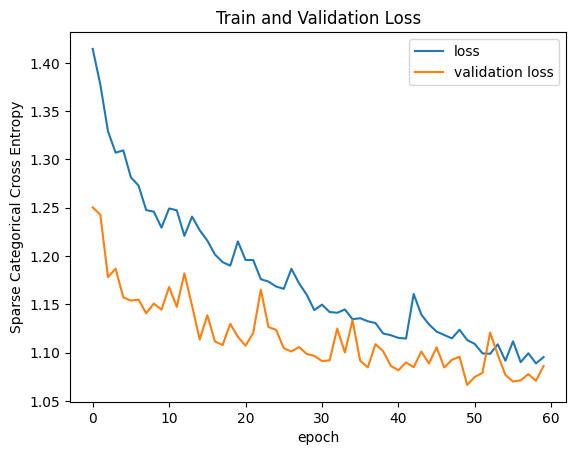

In [36]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.title("Train and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Sparse Categorical Cross Entropy")
plt.show()

In [37]:
numToPredict = 4
predictMe = df.drop('genre', axis = 1).iloc[0:numToPredict]
print(predictMe)
ypred = model.predict(scalerx.transform(predictMe)).argmax(axis=1)
print('Prediction in Numerical ', ypred)
print('Prediction in Text ', le.inverse_transform(ypred))
print('Actual Value ', df.iloc[0:numToPredict]['genre'].to_numpy())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   

   instrumentalness  liveness  valence    tempo  
0          0.013400    0.0556   0.3890  156.985  
1          0.000000    0.1180   0.1240  115.080  
2          0.000004    0.3720   0.0391  218.050  
3          0.000000    0.1140   0.1750  186.948  
1/1 [==============================] - 0s 164ms/step
Prediction in Numerical  [7 7 0 6]
Prediction in Text  ['Underground Rap' 'Underground Rap' 'Dark Trap' 'Trap Metal']
Actual Value  ['Dark Trap' 'Dark Trap' 'Dark Trap' 'Dark Trap']


In [38]:
model.save("saved_model.h5")
loaded_model = keras.models.load_model("saved_model.h5")